/home/spark-0b095579-a354-4f27-984d-7e/.ipykernel/2462/command-5032221180478349-2773235228:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=airline_delays, x='UniqueCarrier', y='ArrDelay', palette='coolwarm')


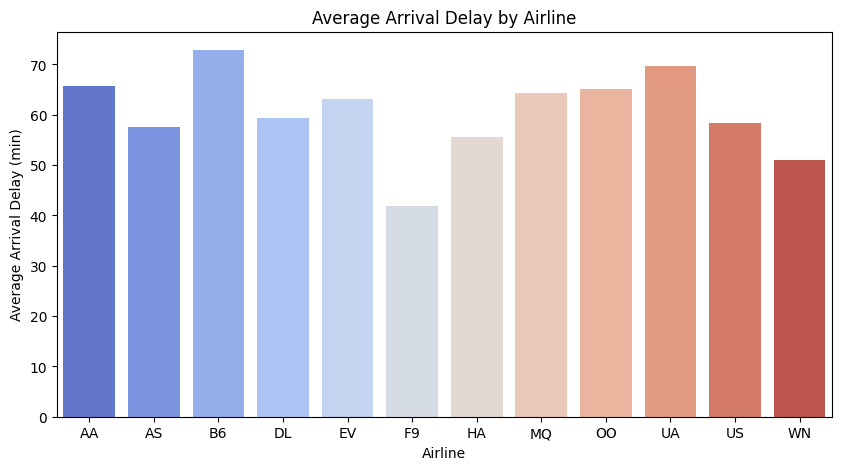

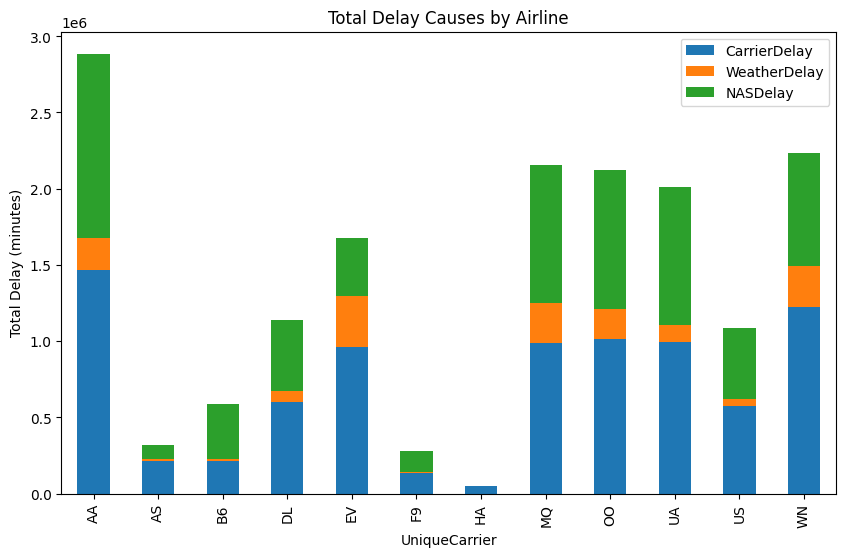

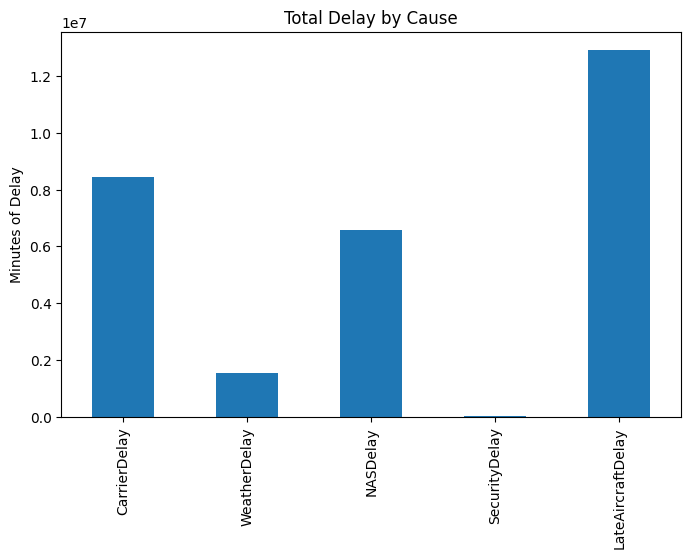

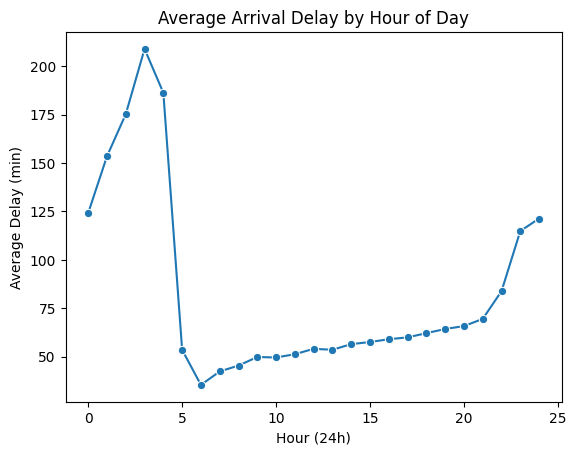

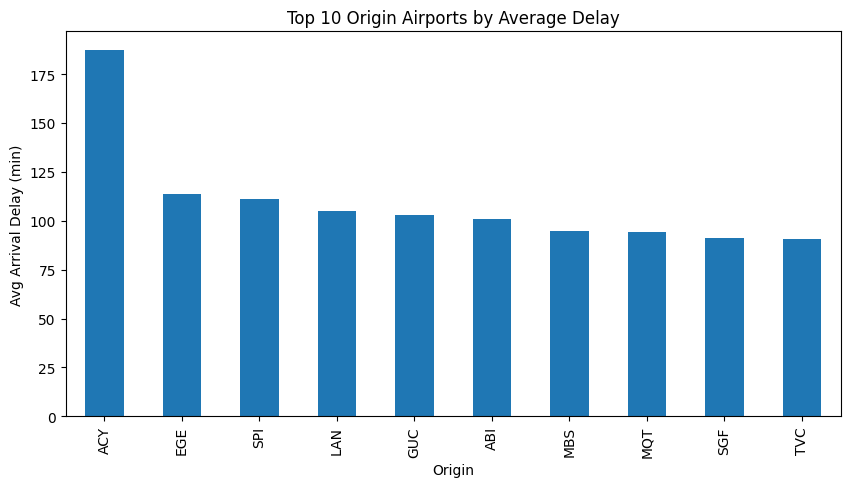

/home/spark-0b095579-a354-4f27-984d-7e/.ipykernel/2462/command-5032221180478349-2773235228:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dow_delay, x='DayOfWeek', y='ArrDelay', palette='viridis')


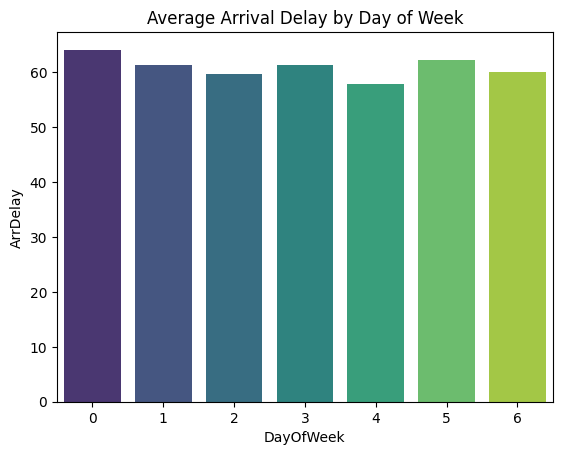

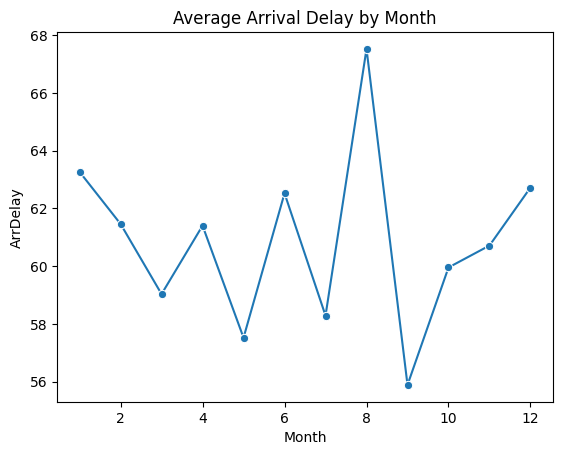

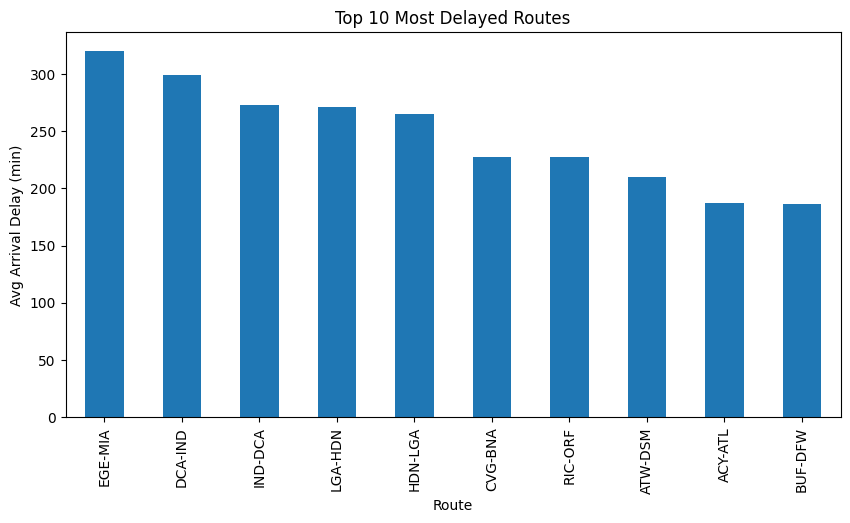

/home/spark-0b095579-a354-4f27-984d-7e/.ipykernel/2462/command-5032221180478349-2773235228:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_avg_delay.index, y=airport_avg_delay.values, palette='coolwarm')


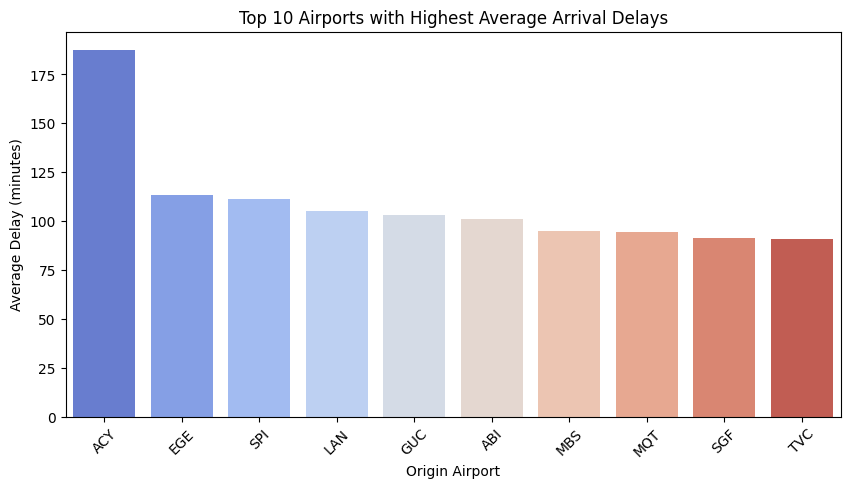

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load data ---
df = pd.read_csv("/Volumes/workspace/default/airlines/Flight_delay_final.csv")

# --- Basic cleanup ---
df = df.dropna(subset=['ArrDelay', 'DepDelay'])  # drop rows missing delay info

# --- 1. Average delay by airline ---
airline_delays = df.groupby('UniqueCarrier')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=airline_delays, x='UniqueCarrier', y='ArrDelay', palette='coolwarm')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (min)')
plt.show()

# --- 2. Delay causes by airline ---
cause_by_airline = df.groupby('UniqueCarrier')[['CarrierDelay','WeatherDelay','NASDelay']].sum().reset_index()
cause_by_airline.set_index('UniqueCarrier').plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Delay Causes by Airline')
plt.ylabel('Total Delay (minutes)')
plt.show()

# --- 3. Overall delay cause breakdown ---
delay_causes = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum()
delay_causes.plot(kind='bar', figsize=(8,5), title='Total Delay by Cause')
plt.ylabel('Minutes of Delay')
plt.show()

# --- 4. Average delay by hour ---
hourly_delay = df.groupby('Hour')['ArrDelay'].mean().reset_index()
sns.lineplot(data=hourly_delay, x='Hour', y='ArrDelay', marker='o')
plt.title('Average Arrival Delay by Hour of Day')
plt.xlabel('Hour (24h)')
plt.ylabel('Average Delay (min)')
plt.show()

# --- 5. Average delay by origin airport ---
airport_delay = df.groupby('Origin')['ArrDelay'].mean().sort_values(ascending=False).head(10)
airport_delay.plot(kind='bar', figsize=(10,5), title='Top 10 Origin Airports by Average Delay')
plt.ylabel('Avg Arrival Delay (min)')
plt.show()

# --- 6. Average delay by day of week ---
dow_delay = df.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()
sns.barplot(data=dow_delay, x='DayOfWeek', y='ArrDelay', palette='viridis')
plt.title('Average Arrival Delay by Day of Week')
plt.show()

# --- 7. Average delay by month ---
month_delay = df.groupby('Month')['ArrDelay'].mean().reset_index()
sns.lineplot(data=month_delay, x='Month', y='ArrDelay', marker='o')
plt.title('Average Arrival Delay by Month')
plt.show()

# --- 8. Average delay by route ---
route_delay = df.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False).head(10)
route_delay.plot(kind='bar', figsize=(10,5), title='Top 10 Most Delayed Routes')
plt.ylabel('Avg Arrival Delay (min)')
plt.show()

# --- 9.Top 10 Airports with Highest Average Arrival Delays ---
airport_avg_delay = df.groupby('Origin')['ArrDelay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=airport_avg_delay.index, y=airport_avg_delay.values, palette='coolwarm')
plt.title('Top 10 Airports with Highest Average Arrival Delays')
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

